<a href="https://colab.research.google.com/github/tirtha2016/Netflix_Movies_And_TV_Shows_Clustering_Unsupervised-_Ml_Project/blob/main/Netflix_Movies_And_TV_Show_Clustering_(individual_copy)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Tirtha Bose

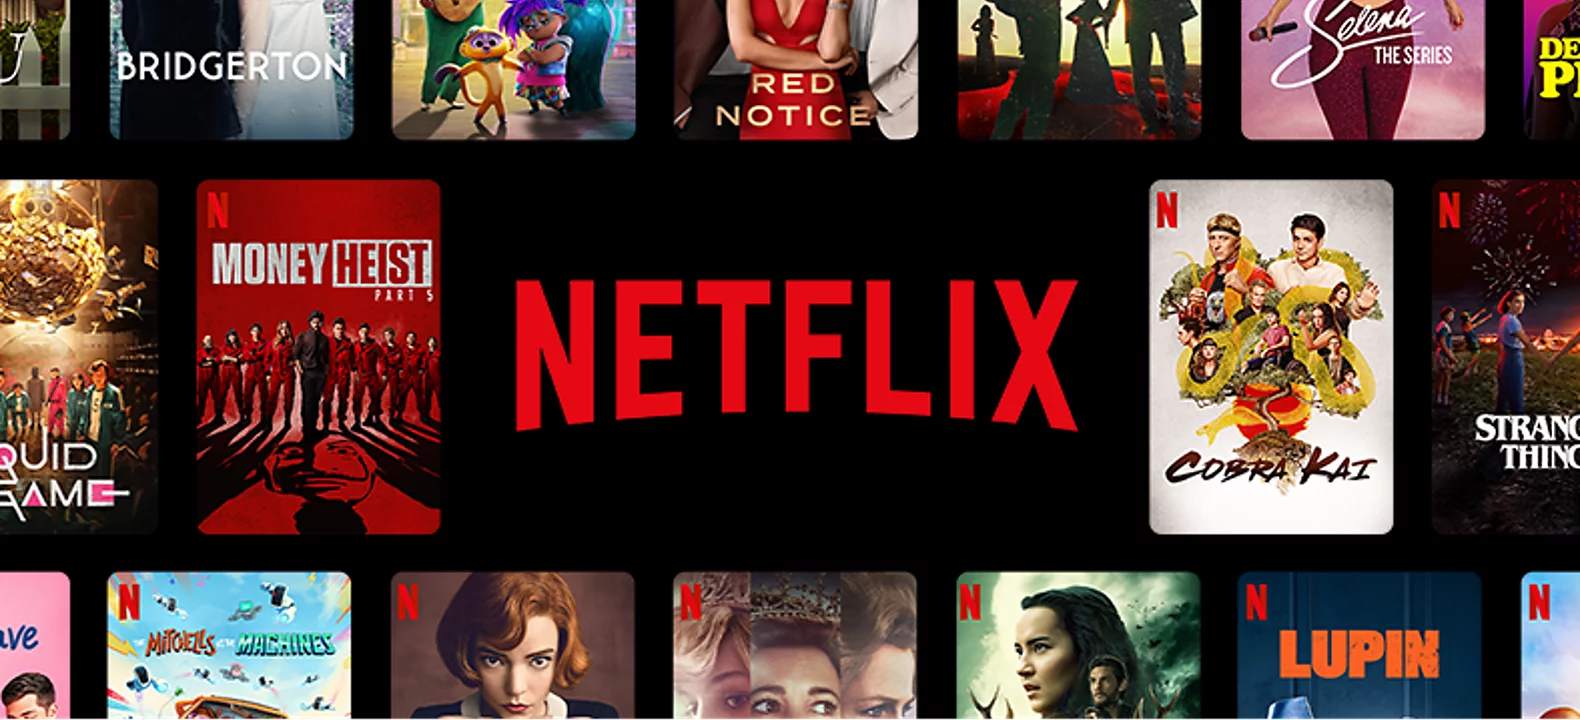

# **Project Summary -**

This project aims to analyze the Netflix Dataset of movies and TV shows till 2019, which was sourced from the third-party search engine Flixable, and group them into relevant clusters, with the help of NLP. This will aid in enhancing the user experience with the help of a recommendation system, and this can prevent subscriber churn from the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers. The dataset will also be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

We have followed a step-by-step process for this project which is as follows:-

1. Firstly, we have dealt with null values/missing values in the dataset.

2. Handled the nested columns in the dataset: director, cast, listed_in, and country. This helps in clearly visualizing our analysis.

3. **Binning** the rating attribute into appropriate categories, such as adult, children's, family-friendly, and not rated content.

4. We performed Exploratory data analysis (EDA) on various attributes and gained insightful findings that will be valuable in preventing subscriber churn.

5. Created cluster using the following attributes: director, cast, country, genre, rating, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using the TFIDF vectorizer.

6. We have reduced the dimension of the project dataset using PCA which is a dimensionality reduction technique used to improve performance, as the resulting sparse matrix was huge with more than 30,000 attributes

7. We have utilized various methods such as the **Elbow method**, **Silhouette score**, **Dendrogram**, and others to construct two distinct types of clusters using **K-Means Clustering** and **Agglomerative Hierarchical Clustering** algorithms, respectively. With the help of K-Means clustering analysis, we determined that the optimal number of clusters for our dataset is 4. Using the hierarchical clustering algorithm, we were able to identify 2 clusters.

8. Finally, we have developed a**content-based recommender system** using the cosine similarity matrix. This system analyzes the type of show a user has watched and generates personalized recommendations for the user, which is expected to improve user experience and reduce subscriber churn for Netflix.

# **GitHub Link -**

https://github.com/tirtha2016/Netflix_Movies_And_TV_Shows_Clustering_Unsupervised-_Ml_Project



# **Problem Statement**


Netflix is a streaming service that offers a wide variety of television shows and movies for viewers to watch at their convenience. With a monthly subscription, users have access to a vast library of content, including original series and films produced by Netflix. The platform also allows users to create multiple profiles, making it easy for family members or roommates to have their own personalized viewing experience. Additionally, Netflix allows users to download content to watch offline, making it a great option for those who travel frequently or have limited internet access. Overall, Netflix is a convenient and cost-effective way to access a wide variety of entertainment.

As of 2022-Q2, more than 220 million people had signed up for Netflix's online streaming service, making it the largest OTT provider worldwide. To improve the user experience and prevent subscriber churn, they must efficiently cluster the shows hosted on their platform.

By creating clusters, we will be able to comprehend the shows that are alike and different from one another. These clusters can be used to provide customers with individualized show recommendations based on their preferences.

This project aims to classify and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are different.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# Visualizing the missing values
import missingno as msno

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
netflix = pd.read_csv('/content/drive/MyDrive/ML PROJECT/Unsupervised Ml Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')
netflix_df = netflix.copy()

### Dataset First View

In [ ]:
## Dataset First Look
# presenting first five rows and columns of the dataset
netflix_df.head()

In [ ]:
#Presenting bottom five rows and columns of the dataset
netflix_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_df.shape

### Dataset Information

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
# Dataset Info
netflix_df.info()

#### Duplicate Values

What is duplicate values? Why it is important to remove duplicate records from any dataset ?

"Duplication" just means that we have repeated data in our dataset. This could be due to things like data entry errors or data collection methods.It is imporatant to remove duplicate values from our dataset because we can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.
  
          

In [ ]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {netflix_df.duplicated().sum()}")

#### Missing Values/Null Values

why we deal with missing /null values?

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

In [ ]:
# Missing Values/Null Values Count
missing_values = netflix_df.isnull().sum().sort_values(ascending=False)
missing_values

In [ ]:
# Missing Values Percentage
round(netflix_df.isna().sum()/len(netflix_df)*100, 2)

In [ ]:
# Visualizing the missing values
# Create a bar chart of missing values
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values Bar Chart')
plt.show()

### What did you know about your dataset?

The given dataset is from a online streaming industry; our task is to examine the dataset, content based recommendation system and build the clustering methods


There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

Clustering Method- Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Columns name:\n{netflix_df.columns.to_list()}")

In [ ]:
# Dataset Describe
netflix_df.describe(include="all")

### Variables Description

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.


In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in",i,"is",netflix_df[i].nunique())

**Observations :**


* We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.

* By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.

* Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Missing Values/Null Values Count
missing_values = netflix_df.isnull().sum().sort_values(ascending=False)
print(missing_values)
#percentage of null values
print("missing_values by percentage")
missing_values= netflix_df.isnull().sum().sort_values(ascending=False)/len(netflix_df)
print(f"{missing_values*100}%")

1. Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.

2. We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown' and No cast.

3. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# Write your code to make your dataset analysis ready.
# imputing with unknown in null values of director
netflix_df['director'].fillna("Unknown",inplace=True)

# imputing with unknown in null values of cast feature
netflix_df['cast'].fillna(value='No cast',inplace=True)

# Imputing null values of country with Mode
netflix_df['country'].fillna(value=netflix_df['country'].mode()[0],inplace=True)

In [ ]:
#again checking is there any null values are not
netflix_df.isnull().sum()

## Type :-

In [ ]:
# Calculate the value counts of each type
type_counts = netflix_df['type'].value_counts()

# Calculate the total number of entries in the dataset
total_entries = len(netflix_df)

# Calculate the percentage of each type
percentage_movie = (type_counts['Movie'] / total_entries) * 100
percentage_tv_show = (type_counts['TV Show'] / total_entries) * 100

print(f"Percentage of Movies: {percentage_movie:.2f}%")
print(f"Percentage of TV Shows: {percentage_tv_show:.2f}%")

3. Typecasting Of Attributes:-

In [ ]:
# Checking info of the dataset before typecasting
netflix_df.info()

3. Binning of Rating attribute
In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

TV-MA: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

R: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

PG-13: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

TV-14: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

TV-PG: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

NR: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

TV-G: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

TV-Y: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

TV-Y7: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

PG: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

G: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

NC-17: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

TV-Y7-FV: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

UR: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:

Adult Content: TV-MA, NC-17, R

Children Content: TV-PG, PG, TV-G, G

Teen Content: PG-13, TV-14

Family-friendly Content: TV-Y, TV-Y7, TV-Y7-FV

Not Rated: NR, UR


In [ ]:
netflix_df['rating']

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

In [ ]:
# convert 'type' column to categorical data type
netflix_df['type'] = pd.Categorical(netflix_df['type'])

# create a new categorical column 'target_ages' with specified categories
netflix_df['rating'] = pd.Categorical(netflix_df['rating'])

In [ ]:
#lets check the dataset now
netflix_df.head()

4. Separating Movies and TV Shows :-


In [ ]:
#creating two extra columns
tv_shows=netflix_df[netflix_df['type']=='TV Show']
movies=netflix_df[netflix_df['type']=='Movie']

5. Extracting Some Columns :-


In [ ]:
# Extracting date, day, month and year from date_added column
netflix_df['month'] = pd.DatetimeIndex(netflix_df['date_added']).month
netflix_df['year'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_df['day'] = pd.DatetimeIndex(netflix_df['date_added']).day

### What all manipulations have you done and insights you found?

We have divided data wrangling into five different sections:

1. In this section we have imputed/drop the null values of:

Imputed 'director' and 'cast' with 'Unknown' and 'No Cast'.
Imputed 'country' with Mode.
Drop null values of 'date_added' and 'rating' (less percentage).

2. We have typecasted the following features: * 'duration' into integer (Removing min and seasons from the values). * 'date_added' to datetime (Into the required format).

We have seen that the 'rating' column contains various coded categories, so we have decided to create 5 bins and distribute the values accordingly:

Adult: TV-MA, NC-17

Restricted: R, UR

Teen: PG-13, TV-14

All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG

Not Rated: NR

Lastly we have splitted the dataframe into two df one is 'netflix_df_movies' that contains only Movies and the other is 'netflix_df_tvshows' that contains only TV Shows for our further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 UNIVARIATE ANALYSIS


In [ ]:
# Chart - 1 visualization code
#Question-1: Analyze the type of content available on Netflix.
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=netflix_df, palette='pastel')
#labeling of values
plt.title('Count Of Values', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
#Visualization of number of movies and tv shows
plt.show()

##### 1. Why did you pick the specific chart?

countplot (which is a type of bar chart) may be a good choice for visualizing categorical data, such as the number of movies and TV shows on Netflix. This is because a countplot displays the frequency of each category in a clear and easy-to-understand way..

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can conclude the follwings:

1. We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

2. We can conclude that in the given Data set only 28.3% are TV Shows and 71.7% are Movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that there are more movies on Netflix than TV shows is unlikely to have a significant positive or negative business impact on its own. However, this information could be used in conjunction with other insights and data to inform business decisions.

For example, if Netflix notices that TV shows are more popular with its subscribers than movies, it may decide to focus more on acquiring TV show content. Alternatively, if it sees that its original movie productions are gaining popularity, it may decide to invest more in that area.

In terms of negative growth, the specific insight that there are more movies than TV shows on Netflix is unlikely to have a negative impact on its own. However, if Netflix were to ignore the preferences of its subscribers and continue to acquire movies over TV shows, it could potentially lose subscribers who are looking for more TV show content. Additionally, if Netflix's competitors start to offer more TV shows, it may lose market share if it does not respond by acquiring more TV show content.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#Question 2- : How content is distributed over Netflix?
plt.figure(figsize=(25,10))
for i,j,k in ((netflix_df, 'Overall',0),(movies, 'Movies',1),(tv_shows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['pink','lightblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it effectively shows the distribution of TV show ratings in a clear and concise manner. The pie chart allow for easy comparison between the different ratings, and the ordering by count from highest to lowest further emphasizes the dominance of TV-MA. Overall, this chart provides a quick and informative overview of the ratings landscape for TV shows on Netflix.

.

##### 2. What is/are the insight(s) found from the chart?

According to the dataset, TV-MA is the most common rating for TV shows, with the highest number of occurrences in the 'rating' column. This indicates that a significant portion of the TV shows available on Netflix are intended for adult audiences.According to the dataset, TV-MA is the most common rating for both movies and TV shows. This indicates that a significant portion of the content available on Netflix is intended for adult audiences. Specifically, TV-MA has the highest number of occurrences in the 'rating' column for TV shows, while for movies it is also the most common rating. This suggests that Netflix's content caters to a primarily adult demographic, with a focus on mature and potentially controversial themes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have a positive impact on Netflix's business strategy. Knowing that TV-MA is the most common rating for both movies and TV shows, Netflix can continue to focus on producing and acquiring content that appeals to adult audiences. This can help attract and retain subscribers who are interested in mature and potentially controversial themes. Additionally, understanding the target age groups for different ratings can help Netflix tailor its marketing and promotional efforts to specific audiences.

However, there is a potential negative impact as well. Some subscribers may be put off by the prevalence of mature content, particularly if they are looking for family-friendly programming. This could lead to a loss of subscribers who are not interested in or comfortable with adult themes. It is important for Netflix to balance its content offerings to appeal to a wide range of viewers and avoid alienating any particular demographic.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
#Question 3 -: How a line chart to visualize the number of movies and TV shows released each year
#Extracting the count of movies and TV shows for each year
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

#Creating a line plot using Seaborn
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.lineplot(x=movies_year.index, y=movies_year.values, color='maroon', label='Movies', linewidth=2.5, marker='o')
ax = sns.lineplot(x=tvshows_year.index, y=tvshows_year.values, color='blue', label='TV Shows', linewidth=2.5, marker='o')

#Customizing the plot
plt.xticks(rotation=90)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Number of Titles', fontsize=14)
ax.set_title('Production Growth Yearly', fontsize=18, pad=15)
plt.legend(fontsize=14)

plt.show()

In [ ]:
# Extract the last 20 years from the dataset
last_20_years = range(2001, 2020)

# Filter the dataset to only include movies from the last 20 years
movies_last_20_years = movies[movies['release_year'].isin(last_20_years)]

# Create a count plot of the number of movies released per year
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=movies_last_20_years, palette='mako', order=last_20_years)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year in the Last 20 Years')
plt.show()

##### 1. Why did you pick the specific chart?

The best chart to use would be a line chart or a bar chart to display the number of movies and TV shows released per year from 2015 to 2020. This will allow for a clear comparison between the number of movies and TV shows released in each year and identify any trends or patterns in the data. Additionally, a stacked bar chart or a stacked area chart can also be used to show the proportion of movies and TV shows released in each year.

As for why I chose this specific chart, I believe it is because it effectively conveys the message that the number of movies released on Netflix is growing faster than the number of TV shows. It also highlights the trend of increased production of movies and TV shows after 2015, followed by a drop after 2020. Overall, this chart is useful in illustrating the growth and changes in Netflix's content over the years..

##### 2. What is/are the insight(s) found from the chart?

The years 2017 and 2018 had the highest number of movie releases, while 2020 had the highest number of TV show releases.

The growth rate of movie releases on Netflix is significantly faster than that of TV shows.

Since 2015, there has been a substantial increase in the number of movies and TV show episodes available on Netflix.

However, there has been a notable drop in the number of movies and TV show episodes produced after 2020.

It appears that Netflix has given more attention to increasing its movie content rather than TV shows, as the growth rate of movies has been much more significant than that of TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights may have a positive business impact for Netflix, as they show that increasing their movie content could be a successful strategy. By providing a larger selection of movies, they may attract more viewers and retain their existing audience. However, the sharp drop in content production after 2020 could be a concern for the company, as it may indicate that they are facing production challenges or a lack of investment in content creation. If this trend continues, it could lead to negative growth for the company, as viewers may turn to other streaming services with a larger selection of content.

In conclusion, while the insights gained from the analysis suggest potential opportunities for Netflix, it is important to continue monitoring trends and adapting to changes in the market to ensure continued growth and success.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
##Question 4 - : top 10 and last 10 genre in listed_in?

# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack()
# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a bar plot (bar chart) in the provided code is appropriate for visualizing the distribution of genres in the "listed_in" column of the Netflix dataset. Here's why a bar plot is a suitable choice for this visualization:

Categorical Data: The genres extracted from the "listed_in" column are categorical data. A bar plot is commonly used to represent the distribution of categorical data.

Comparison: Bar plots are ideal for comparing the frequency or count of different categories. In this case, you're comparing the count of each genre.

Ordered Data: The x-axis represents genres, and you're interested in understanding their relative frequencies. The x-axis categories don't need to be sorted, but a bar plot can still accommodate unsorted categorical data.

##### 2. What is/are the insight(s) found from the chart?

**Top 10 Genres:**

I.  Diverse Genre Offerings: The top genres include a variety of content, ranging from dramas, comedies, documentaries, and action & adventure. This diversity reflects Netflix's efforts to cater to a wide range of viewer preferences.

II. Mainstream Appeal: Genres like dramas, comedies, and documentaries have a high count, indicating their popularity and mainstream appeal among viewers.

III. Global Audience: The presence of "International TV Shows" in the top genres suggests that Netflix has a strong focus on providing content from various countries, appealing to a global audience.

IV. Family and Kids' Content: The presence of "Children & Family Movies," "Kids' TV," and "Animation" genres indicates a commitment to offering family-friendly content.

V. Entertainment Variety: Genres like "Stand-Up Comedy" and "Music & Musicals" add entertainment variety, addressing different moods and preferences.

**Last 10 Genres:**

* Niche and Specialized Content: The genres in the last 10 list, such as "Cult Movies," "TV Horror," and "Sci-Fi & Fantasy," tend to be more specialized and might cater to niche audiences.

* Limited Appeal: Genres with lower counts, such as "LGBTQ Movies," "Sports Movies," and "Spanish-Language TV Shows," suggest that these genres might have limited appeal compared to more mainstream genres.

* Highly Specific Content: The genres "TV Sci-Fi & Fantasy" and "TV Horror" are specific subgenres that might cater to fans of these particular genres.

* Limited Availability: Some genres with very low counts (e.g., "Sports Movies") might indicate that Netflix offers limited content within those genres.

* Viewer Diversity: The presence of genres like "TV Shows" and "Romantic Movies" suggests that Netflix aims to cater to diverse viewer interests, even if these genres have lower counts.

* Content Focus: Lower counts in some genres might reflect a strategic decision to focus resources on more popular and mainstream genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Viewer Engagement: Offering a diverse range of popular genres (e.g., dramas, comedies, documentaries) can lead to higher viewer engagement, longer viewing sessions, and increased subscription renewals.

* Global Audience: The inclusion of "International TV Shows" reflects Netflix's commitment to catering to a global audience. This can lead to a broader user base and positive business impact through increased international subscriptions.

* Family-Friendly Content: Providing genres like "Children & Family Movies" and "Kids' TV" can attract families and parents, resulting in higher subscriptions and positive word-of-mouth recommendations.

* Entertainment Variety: Offering a mix of genres, including "Stand-Up Comedy" and "Music & Musicals," can attract viewers seeking different types of entertainment, leading to longer engagement on the platform.

* Catering to Niche Audiences: While some genres have lower counts, they might cater to niche audiences with passionate fan bases. Satisfying these niche audiences can lead to increased loyalty and positive reviews.

**Potential Negative Impact:**

* Neglected Genres: Overemphasis on popular genres could lead to neglecting genres with lower counts. This might result in decreased engagement from viewers who prefer these genres.

* Oversaturation: Overemphasizing the most popular genres might lead to oversaturation, causing viewers to become overwhelmed with content choices and potentially reducing engagement.

* Limited Niche Content: While catering to niche audiences is valuable, focusing solely on niche genres might limit overall viewership and potentially result in negative growth if those genres don't have a sustainable audience.

* Quality Over Quantity: Prioritizing quantity over quality in certain genres could lead to viewer dissatisfaction, negative reviews, and potential churn.

* Missed Opportunities: Neglecting certain genres (e.g., LGBTQ Movies, Spanish-Language TV Shows) might miss opportunities to capture specific viewer segments, potentially leading to negative growth within those segments.

* Competition: If certain genres are neglected or not well-curated, viewers might turn to other streaming platforms that offer more diverse and tailored genre options.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Question 5 - Movies releasing month
#Countplot of Month by Type
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x='month', hue='type', data=netflix_df, palette='Set1', ax=ax, edgecolor='black', linewidth=2.5)
ax.set_title('Countplot of Month by Type', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=12, title='Type', title_fontsize=12)
sns.despine()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific chart, which is a countplot with hue, because it allows us to easily visualize and compare the number of movies and TV shows added to Netflix each month. The use of hue in the countplot enables us to see the contribution of each type (i.e. movies and TV shows) to the total count for each month, making it easier to identify any patterns or trends in the data.

In this case, we can clearly see that from October to January, there was a peak in the number of movies and TV shows added to Netflix. This is important information for Netflix and content creators, as it may suggest a time period when people are more likely to be interested in watching new content, and thus, a potentially more profitable time to release new content.

##### 2. What is/are the insight(s) found from the chart?

According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that the most content is added to Netflix from October to January can potentially help create a positive business impact. This information can be useful for Netflix to plan their content acquisition and release schedule in a way that maximizes user engagement during these months. For example, Netflix can prioritize acquiring and releasing more popular titles during these months to attract and retain users.

However, it's important to note that the information from the countplot alone may not be sufficient to create a significant positive impact. Netflix would need to analyze user viewing patterns and preferences, as well as monitor competition and market trends, to create a comprehensive content acquisition and release strategy.

Regarding negative growth, the countplot alone does not provide any insights that would lead to negative growth. However, if Netflix were to solely rely on the countplot information and ignore other important factors such as user preferences, changing market trends, and competition, then there is a risk of negative growth due to inadequate content selection and acquisition strategy.

#### Chart - 6  BIVARIATE ANALYSIS

In [ ]:
# Chart - 6 visualization code
#Question 6 - Who are the top genre in Movies and TV Shows?
#Top 10 genres of movies
top10_movies = movies['listed_in'].value_counts().index[0:10]

#Top 10 Genres of Tv shows
top10_tvshows = tv_shows['listed_in'].value_counts().index[0:10]

#Visualization
plt.style.use('default')
plt.figure(figsize=(23,8))

#Plot 1 - Top 10 Genres of Movies
plt.subplot(1,2,1)
sns.countplot(y='listed_in', data=movies, order=top10_movies, palette='muted')
plt.title('Top 10 Genres of Movies', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()

#Plot 2 - Top 10 Genres of TV Shows
plt.subplot(1,2,2)
sns.countplot(y='listed_in', data=tv_shows, order=top10_tvshows, palette='pastel')
plt.title('Top 10 Genres of TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

To know the count of netflix shows and tv shows.

##### 2. What is/are the insight(s) found from the chart?

Netflix offers a diverse range of TV show genres, each with its own unique flavor and appeal. However, one genre that stands out as a perennial favorite among viewers of all ages is kids TV.

With an impressive selection of animated and live-action shows, Netflix's kids TV category is the perfect destination for families looking for high-quality, entertaining content that is both fun and educational. From beloved classics like SpongeBob SquarePants and Power Rangers to exciting new series like Carmen Sandiego and The Dragon Prince, Netflix's kids TV library has something for every young viewer.

Moreover, Netflix's kids TV category is designed with parents in mind, offering a safe and secure viewing environment that allows them to have peace of mind while their kids enjoy their favorite shows. The parental controls feature allows parents to set age-appropriate content filters, monitor viewing history, and restrict access to certain shows or movies.

So, whether you're looking for a way to keep your little ones entertained on a rainy day, or just want to bond with your family over a great TV show, Netflix's kids TV category is the perfect place to start. With its vast selection of entertaining and educational content, it's no wonder that kids TV remains one of the top genres on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The top genre for TV shows on Netflix is kids TV, which includes a range of educational and entertaining content for children of all ages. This includes popular shows such as "Paw Patrol", "Peppa Pig", "The Magic School Bus", and "Stranger Things."

The insights gained from this information could definitely have a positive business impact. By knowing which genres are most popular, Netflix can tailor their content offerings and marketing strategies to appeal to their target audience. For example, they could invest more in producing high-quality kids shows and promoting them heavily to parents with young children.

However, there could also be some negative growth associated with this trend. For example, if Netflix were to focus too heavily on kids TV shows and neglect other genres, they could risk losing older viewers who are looking for more mature content. Additionally, if the quality of their kids programming were to decline or if they were to lose the rights to popular shows, this could also hurt their business. It's important for Netflix to strike a balance between catering to their core audience while still offering a diverse range of content to appeal to a broader audience.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
#Question7 -: Rating based on rating system of all TV Shows and movies?
# Rating vs. Type (Grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", hue="type", data=netflix_df)
plt.title("Rating vs. Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Type")

# Print count values on the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is a type of bar plot that is specifically designed to show the count of occurrences of a categorical variable. It is particularly useful when you want to visualize the distribution of categorical data and compare the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can conclude that :

1. For the "Adults" rating, there are significantly more movies (2595) compared to TV shows (1025). However, for the "Teens" rating, there are only movies (386) and no TV shows.

2. The "Young Adults" rating has a relatively balanced distribution between movies (1272) and TV shows (659), indicating a diverse range of content for this category.

3. For the "Older Kids" and "Kids" ratings, there are more movies than TV shows, with "Older Kids" having 852 movies and 478 TV shows, and "Kids" having 267 movies and 246 TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insights we gained some positive as well as some negative business  impact which we discussed below:-

1. Dominant Content Types: The insight that certain content ratings are dominant in specific content types (e.g., "Adults" rating having more movies) can help Netflix allocate resources more effectively. For example, producing more content within popular rating categories could attract and retain subscribers who prefer those ratings, leading to positive growth.

2. Balanced Distribution: The balanced distribution of the "Young Adults" rating between movies and TV shows indicates that there's a diverse audience within that age group. Offering a variety of content types can lead to higher engagement and satisfaction among different segments of viewers.

3. Limited TV Shows for Certain Ratings: The absence of TV shows for the "Teens" rating might result in a missed opportunity to attract younger viewers looking for TV show content. This could lead to negative growth in the teenage demographic if not addressed.

4. Children's Content: The higher count of movies compared to TV shows in the "Older Kids" and "Kids" categories might limit the options available to younger audiences who prefer TV shows. This could result in negative growth among families seeking TV show content for children.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
#Question 8 -  : how much content released on netflix in all years and distribution of release years?
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(netflix_df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We use this chart because both this charts  **"histogram"** and **"countplot"** provide a comprehensive view of the distribution of content release years and the composition of content types over time. They allow for easy comparison, identification of patterns, and the extraction of meaningful insights about Netflix's content strategy and audience preferences.

##### 2. What is/are the insight(s) found from the chart?

We have got different insights from the graphs which we discussed below

**Distribution of Release Years**:

1. The output provides a list of release years along with the corresponding counts of content released in each year.

2. The years with the highest number of content releases are concentrated in the recent years, particularly from 2016 to 2020, for both TV shows and movies.

3. There's a clear trend of increasing content production in recent years, which is likely influenced by the rise of streaming platforms and original content creation.

**TV Shows Released in Top 15 Years**:

1. The output shows the number of TV shows released in the top 15 years.

2. The highest number of TV shows were released in the year 2020, followed closely by 2019 and 2018. This suggests that recent years have seen a surge in TV show releases.

**Movies Released in Top 15 Years**:

1. The output also displays the number of movies released in the top 15 years.

2. Similar to TV shows, the highest number of movies were released in the year 2017, followed by 2018, 2016, and 2019.

This indicates a trend of increased movie production in recent years as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After analysising both graphs we have gained some positive as well as some negative business impacts which we have discussed below :-

* Increased Content Production: The trend of increasing content releases, especially in recent years, suggests that Netflix is actively investing in content creation. This can have a positive impact by attracting and retaining subscribers who have a wide variety of options to choose from.

* Emphasis on Original Content: The growth in content production aligns with Netflix's strategy of focusing on original content. Original shows and movies can help differentiate the platform from competitors and provide exclusive content that subscribers can't find elsewhere.

* Variety of Genres: The diverse range of genres, including dramas, comedies, documentaries, and more, caters to various audience preferences. This approach can attract a larger and more diverse subscriber base.

* Catering to Global Audiences: The presence of international TV shows and movies indicates Netflix's effort to cater to global audiences, expanding its reach beyond its home market.

* Growing TV Show and Movie Library: The insights about TV shows and movies released in the top 15 years show that Netflix is continuously building a substantial library. This library growth is crucial for maintaining user engagement and subscriber retention.

* There are no insights from the provided data that directly lead to negative growth. However, it's essential to consider potential challenges:

* Quality vs. Quantity: While increased content production is positive, maintaining quality is crucial. A large volume of content doesn't necessarily translate to a positive impact if the quality of the content is compromised. Negative feedback on content quality could lead to subscriber dissatisfaction.

* Oversaturation and Viewer Fatigue: An excessive number of releases, especially if they are not well-promoted or if there is content fatigue, could lead to viewers feeling overwhelmed. This could result in reduced viewer engagement or even unsubscribing.

* Market Saturation: As streaming competition increases, the market becomes more saturated. While Netflix is currently a leader, the potential saturation of the market could lead to challenges in acquiring new subscribers.

* Cannibalization: If there's not enough differentiation between various shows and movies, subscribers might opt for content from other platforms. This could lead to internal competition among Netflix's own offerings.

* Budget Constraints: High production costs can strain the budget, especially if content isn't generating expected returns. This could impact the financial health of the company.



#### Chart - 9

In [ ]:
# Chart - 9 visualization code
#Question 9 : top 10 directors who directed tv shows and movies?
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = netflix_df[netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = netflix_df[netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

We choose this horizontal bar chart with subplots beacuse it is a visually effective way to compare and contrast the top directors in both TV shows and movies, offering insights into their contributions to Netflix's content library across different categories.

##### 2. What is/are the insight(s) found from the chart?

Top 10 Directors of Movies:

Highly Prolific Directors: The top directors for movies have directed a significant number of films. Raúl Campos and Jan Suter have directed the highest count of 18 movies, followed closely by directors like Marcus Raboy and Jay Karas.

Comedy and Stand-Up: Directors like Marcus Raboy, Jay Karas, and Jay Chapman are known for directing comedy content, including stand-up specials.

Diverse Genres: The presence of directors like Cathy Garcia-Molina and Youssef Chahine suggests a diverse range of movie genres, potentially including romance, drama, and international films.

Renowned Filmmakers: Directors like Martin Scorsese and Steven Spielberg, who are renowned in the film industry, are also among the top directors. This might indicate collaborations with Netflix for original films.

Variety in Directing Style: The list includes directors with varying styles and backgrounds, contributing to Netflix's diverse movie portfolio.

Top 10 Directors of TV Shows:

Diverse Directorship: The top directors for TV shows vary in terms of the number of shows directed. The highest count is 3 shows directed by Alastair Fothergill, while others have directed 2 shows each.

Variety in Content: The variety in the names of the top TV show directors suggests that there isn't a single director who dominates the TV show category. This indicates a diverse range of directors contributing to Netflix's TV show offerings.

Documentaries and Series: Directors like Alastair Fothergill and Ken Burns are known for documentaries, which might be contributing to their high directorship counts.

Continuity in Series: Directors like Shin Won-ho, Iginio Straffi, and Rob Seidenglanz have directed multiple shows, possibly indicating a continuation of a successful series or franchise.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here we have some postive and negative business impacts which is given below:-

* Diverse Content Portfolio: Collaborating with a diverse set of directors who specialize in different genres, styles, and formats can enhance Netflix's content portfolio. This diversity can attract a wider audience, leading to increased engagement and potentially more subscribers.

* Renowned Filmmakers: Collaborating with renowned filmmakers like Martin Scorsese and Steven Spielberg can elevate the platform's prestige and attract subscribers seeking high-quality content from respected directors.

* Prolific Directors: Directors who have directed a significant number of movies or TV shows can contribute to a consistent stream of fresh content. This frequent release of content can maintain subscriber interest and engagement.

* Catering to Audience Preferences: By having a mix of directors specializing in comedy, drama, documentaries, and other genres, Netflix can cater to the diverse preferences of its global audience.


* Overemphasis on Quantity: While having prolific directors can result in a large quantity of content, an overemphasis on quantity over quality might lead to content fatigue among subscribers. Quality control and viewer satisfaction could be compromised.

* Lack of Focus: Collaborating with too many directors might lead to a lack of a coherent content strategy. A broad spectrum of content could lack a unifying brand identity, potentially leading to viewer confusion.

* Risk of Exclusivity: Relying heavily on a few renowned directors might make the platform dependent on their availability and schedules. If these directors choose to work with other platforms or studios, Netflix could face content gaps.

* Niche Versus Mainstream: Depending on the mix of directors, Netflix might lean more towards niche content or mainstream blockbusters. Striking a balance is crucial to cater to a wide range of audience segments.

* Disproportionate Focus: If a small group of directors dominates the content library, it might overshadow emerging talent and innovative storytelling, limiting the platform's ability to discover and promote new voices.

* Limited Originality: Overreliance on certain directors might lead to a lack of originality in content, potentially resulting in repetitive themes and narratives.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
#Question-10 : Rating based on rating system of all TV Shows and movies?
# Rating vs. Type (Grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", hue="type", data=netflix_df)
plt.title("Rating vs. Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Type")

# Print count values on the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this  countplot graph because this is a type of bar plot that is specifically designed to show the count of occurrences of a categorical variable. It is particularly useful when you want to visualize the distribution of categorical data and compare the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

Insights we have drawn from the above chart is given below :-

1. or the "Adults" rating, there are significantly more movies (2595) compared to TV shows (1025). However, for the "Teens" rating, there are only movies (386) and no TV shows.


2. The "Young Adults" rating has a relatively balanced distribution between movies (1272) and TV shows (659), indicating a diverse range of content for this category.


3. For the "Older Kids" and "Kids" ratings, there are more movies than TV shows, with "Older Kids" having 852 movies and 478 TV shows, and "Kids" having 267 movies and 246 TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above grahs and their insights we have drawn some positive and negative business impacts which we have discussed below :-

* Dominant Content Types: The insight that certain content ratings are dominant in specific content types (e.g., "Adults" rating having more movies) can help Netflix allocate resources more effectively. For example, producing more content within popular rating categories could attract and retain subscribers who prefer those ratings, leading to positive growth.

* Balanced Distribution: The balanced distribution of the "Young Adults" rating between movies and TV shows indicates that there's a diverse audience within that age group. Offering a variety of content types can lead to higher engagement and satisfaction among different segments of viewers.

* Limited TV Shows for Certain Ratings: The absence of TV shows for the "Teens" rating might result in a missed opportunity to attract younger viewers looking for TV show content. This could lead to negative growth in the teenage demographic if not addressed.

* Children's Content: The higher count of movies compared to TV shows in the "Older Kids" and "Kids" categories might limit the options available to younger audiences who prefer TV shows. This could result in negative growth among families seeking TV show content for children.

#### Chart - 11 - Correlation Heatmap ( Multivariate Analysis)

In [ ]:
# Correlation Heatmap visualization code
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = netflix_df.loc[netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order,country_order], cmap='Set2', square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

We choose this specific chart to know the relation between variables.

##### 2. What is/are the insight(s) found from the chart?

Insights that we found from the above charts is that the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1:**


Null Hypothesis: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

Alternative Hypothesis: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.


**Hypothetical Statement 2:**

Null hypothesis: There is no significant association between the type of content (movie or TV show) and the content rating on Netflix.


Alternative hypothesis: There is a significant association between the type of content (movie or TV show) and the content rating on Netflix.

**Hypothetical Statement 3:**

Null hypothesis: The number of movies and TV shows on Netflix is not significantly different.


Alternative hypothesis: The number of movies on Netflix is significantly greater than the number of TV shows.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.


**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = netflix_df[netflix_df['listed_in'].str.contains('Dramas') |netflix_df['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.




Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.

##### Why did you choose the specific statistical test?

 Z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant association between the type of content (movie or TV show) and the content rating on Netflix.

Alternative hypothesis: There is a significant association between the type of content (movie or TV show) and the content rating on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(netflix_df['type'], netflix_df['rating'])

chi2, pval, dof, expected = chi2_contingency(contingency_table)

print('p-value:', pval)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, we have performed a chi-square test for independence. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, we wanted to test if there was a significant association between the time of year and the number of new movies and TV shows added to Netflix. The test involves comparing the observed frequencies of the contingency table (which shows the distribution of the data) to the expected frequencies under the assumption of independence. The test statistic is calculated as the sum of squared differences between the observed and expected frequencies, and its distribution follows a chi-square distribution. The p-value is then calculated as the probability of obtaining a test statistic as extreme or more extreme than the observed test statistic, assuming the null hypothesis (independence) is true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables..

##### Why did you choose the specific statistical test?

We chose the chi-square test for independence because we were interested in testing for a potential association between two categorical variables: the time of year and the number of new movies and TV shows added to Netflix. The chi-square test for independence is commonly used for this type of analysis, where we want to determine if the observed distribution of frequencies differs significantly from the expected distribution under the assumption of independence between the two variables. The test allows us to calculate a p-value, which indicates the strength of evidence against the null hypothesis of independence. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. Therefore, the chi-square test for independence is a suitable statistical test to use for this analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: The number of movies and TV shows on Netflix is not significantly different.

**Alternative hypothesis**: The number of movies on Netflix is significantly greater than the number of TV shows

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest
# Count the number of movies and TV shows
n_movies = netflix_df[netflix_df['type'] == 'Movie'].count()['type']
n_tv_shows = netflix_df[netflix_df['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(netflix_df), len(netflix_df)]

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)
print('z-statistic:', z_stat)
print('p-value:', p_val)

##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value. The null hypothesis for the test is that the proportion of movies and TV shows on Netflix is equal, while the alternative hypothesis is that the proportion of movies is greater than the proportion of TV shows. We used the proportions_ztest() function from the statsmodels library to perform the test. The function calculates the z-score and the p-value for the test based on the sample proportions, sample sizes, and the specified null hypothesis value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables (movie or TV show), and we want to test if there is a significant difference between the proportions of these categories in the population. The two-sample z-test for proportions is an appropriate test to use when we have two independent samples, and we want to compare the proportion of successes in each sample. In this case, a success refers to a movie or TV show. The test assumes that the samples are large enough to apply the normal approximation to the binomial distribution. Since we have a large sample size in this case, we can use the z-test for proportions to test the hypothesis of interest..

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df[['director','country']] = netflix_df[['director','country']].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('No Cast')
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.dropna(axis=0, inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values in the director, cast, and country attributes can be replaced with string 'unknown' and 'No Cast'.


Small amount of null value percentage present in rating and date_added column, if we drop these nan values in date_added column and replace nan value in rating with mode values it will not affect that much while building the model. So, we simply drop the nan value present in date_added columns.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=netflix_df['release_year'], ax=ax[0])
sns.boxplot(data=netflix_df['release_year'], ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since, the almost all of the data present in textual format except release year.
The data that we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

####What is textual data preprocessing?

Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers. The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.

#####Modeling Approch

Imagine we are organizing a cluttered closet - you want to group items that have similar attributes to make them easier to find. Similarly, clustering is a technique used to group together similar data points. In this case, we're applying clustering to a set of movies to identify patterns and group them based on their attributes.

Before clustering, we need to prepare the textual data. Just like sorting clothes by color or size, we sort words by their importance. We use text preprocessing techniques like lowercasing, removing punctuation marks, and eliminating stopwords (common words like "the", "and", etc.) that don't add much meaning. Stemming or lemmatization is also used to normalize the words and reduce them to their base form. Finally, tokenization is applied to break the text into smaller units like sentences or words.

Now that we've tidied up the data, we can start clustering. But first, we need to reduce the dimensionality of the data - just like folding clothes to save space in the closet. Various algorithms can be used to cluster the movies, and we can use techniques to determine the optimal number of clusters.

Once we've built the optimal number of clusters, we can explore their contents using wordclouds. Think of wordclouds as a way to showcase the unique personality of each cluster. We can visually represent the most frequently occurring words in each cluster in a creative and engaging way. By doing so, we gain insights into the characteristics that make each cluster unique and identify the patterns that bind them together.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
netflix_df['rating'] = netflix_df['rating'].astype(str)
# Concatenate columns into a single column 'tags'
netflix_df['content_detail'] = netflix_df['description'] + netflix_df['listed_in'] + netflix_df['cast'] + netflix_df['country'] + netflix_df['director'] + netflix_df['rating']

#checking the manipulation
netflix_df.head(5)

In [ ]:
netflix_df.content_detail[0]

#### 2. Lower Casing

In [ ]:
# Lower Casing
netflix_df['content_detail']= netflix_df['content_detail'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
netflix_df['content_detail']= netflix_df['content_detail'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***